In [4]:
# import OE tools and data
#import oenotebook as oenb
from openeye import oechem

<!-- fold -->

In [5]:
import matplotlib.pyplot as plt
#import mpld3
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
colors = sns.color_palette()
# sns.palplot(colors)
do_tooltips = False


In [6]:
df_random = oenb.read_file_to_dataframe("./eMol_ran200.ism", title_col="Title")
df_2clus = oenb.read_file_to_dataframe("./2targ_200.oeb", title_col="Title")

NameError: name 'oenb' is not defined


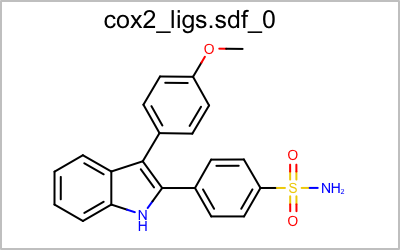
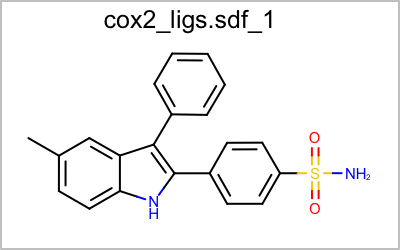

In [4]:
oenb.render_dataframe(df_2clus.head(2))


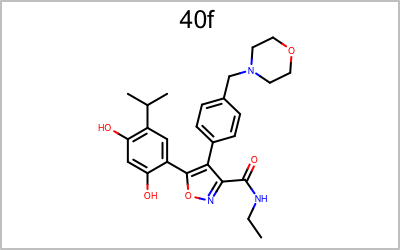
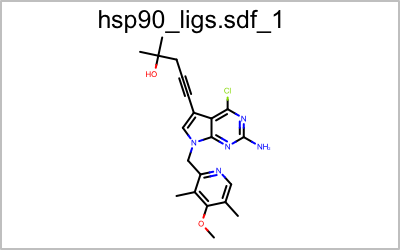

In [5]:
oenb.render_dataframe(df_2clus.iloc[100:102])

In [6]:
df_2clus['img'] = df_2clus.Molecule.apply(oenb.draw_mol_to_img_tag)
df_random['img'] = df_random.Molecule.apply(oenb.draw_mol_to_img_tag)

** Molecule Distances **

Now we need to calculate the distances between all the molecules in each dataset. We'll import a simple $n$-by-$n$ calculation object which uses [path fingerprint](http://docs.eyesopen.com/toolkits/python/graphsimtk/fingerprint.html#path) and converts to a distance.

In [7]:
from dist import CachingMolDistance, MolFPDist

In [8]:
rand_dists = CachingMolDistance(MolFPDist)
rand_dists.load(df_random.Molecule)


two_dists = CachingMolDistance(MolFPDist)
two_dists.load(df_2clus.Molecule)

In [9]:
# Split molecules for better plotting
cox_df = df_2clus[df_2clus.Target == "Cyclooxygenase-2"]
hsp_df = df_2clus[df_2clus.Target == "Heat Shock Protein 90 (Hsp90)"]

## Multidimensional Scaling

Multidimensional scaling attempts to find a representation in a lower dimensional space where distances between members are preserved from the high-dimensional space.

In [10]:
from sklearn.manifold import MDS

In [11]:
two_mds = MDS(dissimilarity="precomputed", max_iter=1000)
Y = two_mds.fit_transform(two_dists.DistArray)

rand_mds = MDS(dissimilarity="precomputed", max_iter=1000)
D = rand_mds.fit_transform(rand_dists.DistArray)

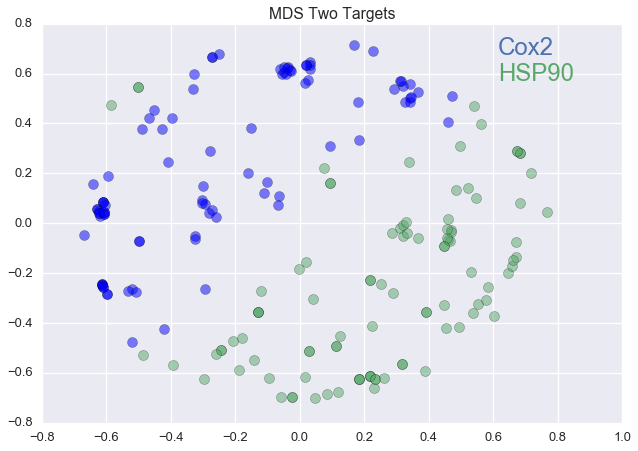

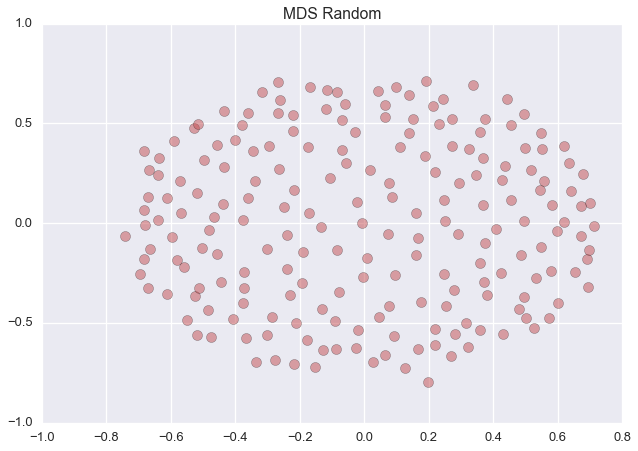

In [12]:
f = plt.figure()
sc = plt.scatter(Y[cox_df.index, 0], Y[cox_df.index, 1], s=100, alpha=0.5,label="Cox2")
sc2 = plt.scatter(Y[hsp_df.index, 0], Y[hsp_df.index, 1], c=colors[1], s=100, alpha=0.5,label="HSP90")

plt.title("MDS Two Targets")
plt.text(0.8*max(Y[:,0]),0.95*max(Y[:,1]),"Cox2",color=colors[0],size=24)
plt.text(0.8*max(Y[:,0]),0.8*max(Y[:,1]),"HSP90",color=colors[1],size=24)

if do_tooltips:
    oenb.add_molecule_tooltips(cox_df, sc, f, show=False, img_col="img")
    oenb.add_molecule_tooltips(hsp_df, sc2, f, img_col="img")
    f.clear()



f = plt.figure()
sc = plt.scatter(D[:,0], D[:,1], s=100, alpha=0.5, c=colors[2])
plt.title("MDS Random")
if do_tooltips:
    oenb.add_molecule_tooltips(df_random, sc, f, img_col="img")


### Non-metric MDS

Multidimensional scaling can also be performed without the assumption that this distances are a metric which satisfy the triangle inequality. The embedding attempts to preserve the order of the distances. 

In [13]:
two_nmds = MDS(dissimilarity="precomputed", max_iter=1000, metric=False)
Y = two_nmds.fit_transform(two_dists.DistArray)

rand_mds = MDS(dissimilarity="precomputed", max_iter=1000, metric=False)
D = rand_mds.fit_transform(rand_dists.DistArray)

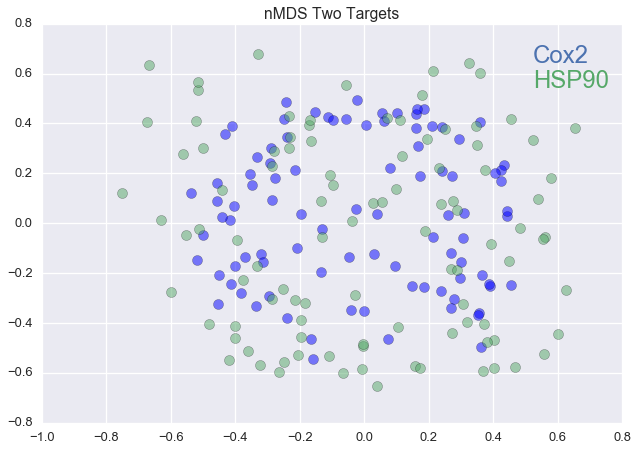

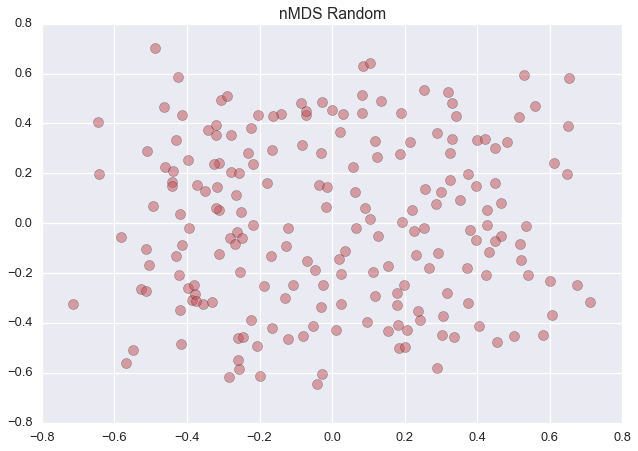

In [14]:
f = plt.figure()
sc = plt.scatter(Y[cox_df.index, 0], Y[cox_df.index, 1], s=100, alpha=0.5,label="Cox2")
sc2 = plt.scatter(Y[hsp_df.index, 0], Y[hsp_df.index, 1], c=colors[1], s=100, alpha=0.5,label="HSP90")

plt.title("nMDS Two Targets")
plt.text(0.8*max(Y[:,0]),0.95*max(Y[:,1]),"Cox2",color=colors[0],size=24)
plt.text(0.8*max(Y[:,0]),0.8*max(Y[:,1]),"HSP90",color=colors[1],size=24)

if do_tooltips:
    oenb.add_molecule_tooltips(cox_df, sc, f, show=False, img_col="img")
    oenb.add_molecule_tooltips(hsp_df, sc2, f, img_col="img")
    f.clear()

f = plt.figure()
sc = plt.scatter(D[:,0], D[:,1], s=100, alpha=0.5, c=colors[2])
plt.title("nMDS Random")
if do_tooltips:
    oenb.add_molecule_tooltips(df_random, sc, f, img_col="img")

## t-distributed Stochastic Neighbor Embedding

The **t-SNE** algorithm treats distances as joint gaussian distributions and minimizes the [KL divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the probabilities in the low-dimensional embedding and the original high-dimensional space.

In [15]:
from sklearn.manifold import TSNE

In [16]:
two_tsne = TSNE(metric="precomputed", learning_rate=150)
Y = two_tsne.fit_transform(two_dists.DistArray)

rand_tsne = TSNE(metric="precomputed", learning_rate=150)
D = rand_tsne.fit_transform(rand_dists.DistArray)

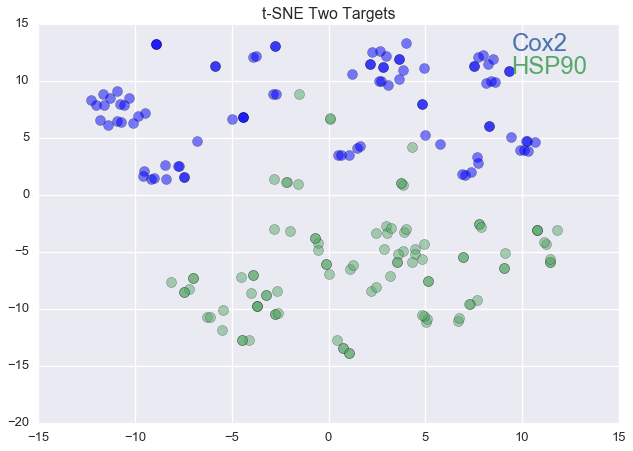

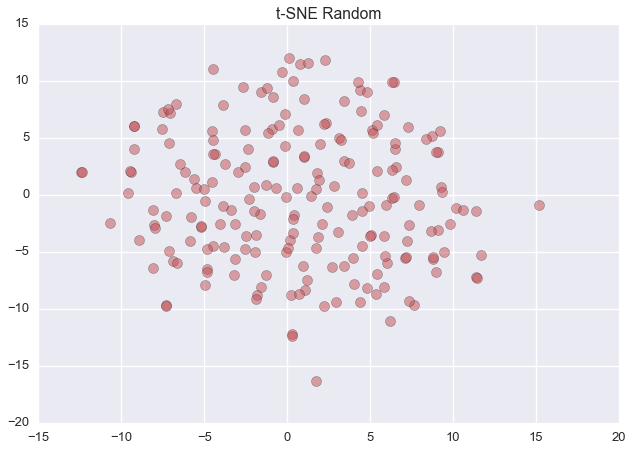

In [17]:
f = plt.figure()
sc = plt.scatter(Y[cox_df.index, 0], Y[cox_df.index, 1], s=100, alpha=0.5,label="Cox2")
sc2 = plt.scatter(Y[hsp_df.index, 0], Y[hsp_df.index, 1], c=colors[1], s=100, alpha=0.5,label="HSP90")

plt.title("t-SNE Two Targets")
plt.text(0.8*max(Y[:,0]),0.95*max(Y[:,1]),"Cox2",color=colors[0],size=24)
plt.text(0.8*max(Y[:,0]),0.8*max(Y[:,1]),"HSP90",color=colors[1],size=24)

if do_tooltips:
    oenb.add_molecule_tooltips(cox_df, sc, f, show=False, img_col="img")
    oenb.add_molecule_tooltips(hsp_df, sc2, f, img_col="img")
    f.clear()

f = plt.figure()
sc = plt.scatter(D[:,0], D[:,1], s=100, alpha=0.5, c=colors[2])
plt.title("t-SNE Random")
if do_tooltips:
    oenb.add_molecule_tooltips(df_random, sc, f, img_col="img")
    f.clear()

## Spectral Embedding

Spectral embedding finds a low-dimensional representation through spectral decomposition on the laplacian of the affinity graph.

In [18]:
from sklearn.manifold import SpectralEmbedding

In [19]:
se = SpectralEmbedding(affinity="precomputed")
Y = se.fit_transform(1.0 - two_dists.DistArray)

rand_se = SpectralEmbedding(affinity="precomputed")
D = rand_se.fit_transform(1.0 - rand_dists.DistArray)

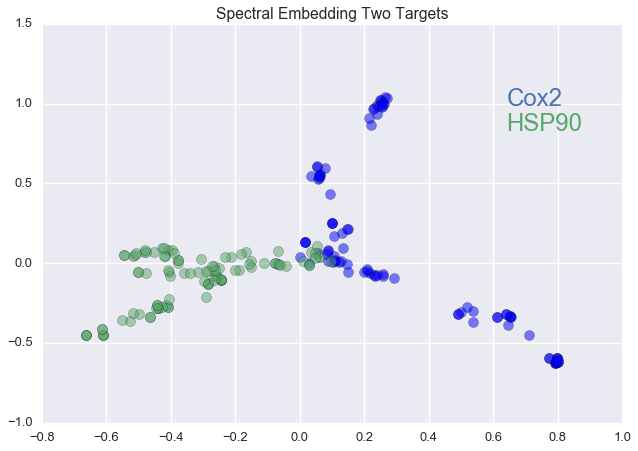

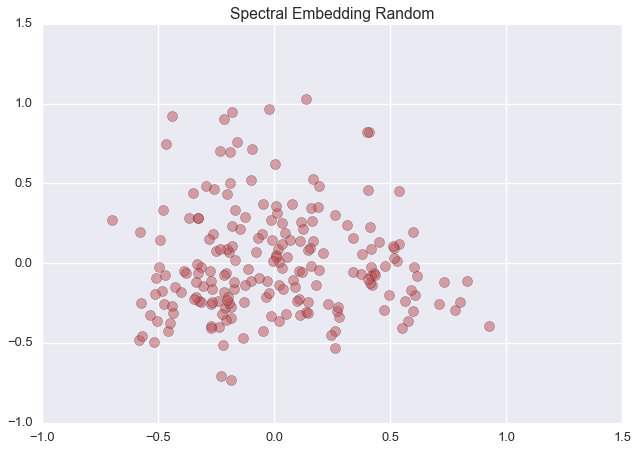

In [20]:
f = plt.figure()
sc = plt.scatter(Y[cox_df.index, 0], Y[cox_df.index, 1], s=100, alpha=0.5,label="Cox2")
sc2 = plt.scatter(Y[hsp_df.index, 0], Y[hsp_df.index, 1], c=colors[1], s=100, alpha=0.5,label="HSP90")
plt.text(0.8*max(Y[:,0]),0.95*max(Y[:,1]),"Cox2",color=colors[0],size=24)
plt.text(0.8*max(Y[:,0]),0.8*max(Y[:,1]),"HSP90",color=colors[1],size=24)

plt.title("Spectral Embedding Two Targets")

if do_tooltips:
    oenb.add_molecule_tooltips(cox_df, sc, f, show=False, img_col="img")
    oenb.add_molecule_tooltips(hsp_df, sc2, f, img_col="img")
    f.clear()

f = plt.figure()
sc = plt.scatter(D[:,0], D[:,1], s=100, alpha=0.5, c=colors[2])
plt.title("Spectral Embedding Random")
if do_tooltips:
    oenb.add_molecule_tooltips(df_random, sc, f, img_col="img")
    f.clear()